In [13]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from matplotlib import gridspec
from NFW_Z import NFW_Z

## NOTE: The following code uses the ENCLOSED density within spherical shells.

In [37]:
class AvDensProf:
    
    
    def __init__(self, Mv):
        
        """Initiate the class with a known virial mass of the halo.
        Input: virial mass in solar masses."""
        
        self.Mvir = Mv


    def find_dens_profile(self, raw_radius_data, radius_array, bin_size):
        
        """Derive an AVERAGE dark matter density profile from raw data.
        Inputs:
        1) raw_radius_data: array of the radii at which dark matter particles are found, based on provided data.
        2) radius_array: array of the radii of imaginary spherical shells centered on the galactic center.
        3) bin_size: integer that best matches the image resolution.
        Output: density_profile (the AVERAGE dark matter density profile of the data)"""
        
        density_profile = np.zeros(np.size(radius_array))
        i = 0
        for radius_value in radius_array: # enclosed density
            particles = np.where((raw_radius_data < (radius_value + bin_size)))
            how_many_particles = np.size(particles)
            shell_volume = 4/3*np.pi*((radius_value + bin_size)**3)
            density_profile[i] = how_many_particles / shell_volume * 500 #500 is 500 M_Sun, the mass per particle
            i += 1
        return density_profile
    
    
    def deriving_r200(self, rho_crit, density_profile, bin_size, radius_array):
        
        """Using the extended radius array from extension, this function generates an extended density profile
        that's shaped like the graph of 1/x^3, then finds the radius on the extended radius array that best
        matches a density equal to 200 times the critical density on the density array. 
        Inputs:
        1) rho_crit: the critical density in this specific case.
        2) density_profile: the AVERAGE dark matter density profile of the data.
        3) bin_size: how big each increment is between two elements of the array.
        4) radius_array: array of the radii of imaginary spherical shells centered on the galactic center.
        Output: rad200 (the radius where the density best matches 200 times rho_crit)"""
        
        deviation = np.abs(density_profile - rho_crit*200)
        least_difference_index = deviation.argmin()
        rad200 = radius_array[least_difference_index]
        return rad200
        
        
    def deriving_r_RDO(self, rho_crit, rho_delta_omega, density_profile, bin_size, radius_array):

        """Using the extended radius array from extension, this function generates an extended density profile
        that's shaped like the graph of 1/x^3, then finds the radius on the extended radius array that best
        matches a density equal to rho_crit * delta_vir * Omega_M. 
        Inputs:
        1) rho_crit: the critical density in this specific case.
        2) rho_delta_omega: rho_crit * delta_vir * Omega_M. This value is dependent on the redshift observed.
        3) density_profile: the AVERAGE dark matter density profile of the data.
        4) bin_size: how big each increment is between two elements of the array.
        5) radius_array: array of the radii of imaginary spherical shells centered on the galactic center.
        Output: rad_rdo (the radius where the density best matches rho_crit * delta_vir * Omega_M)"""
        
        difference = abs(density_profile - rho_delta_omega)
        smallest_diff_index = difference.argmin()
        rad_rdo = radius_array[smallest_diff_index]
        return rad_rdo
        
        
    def final_plot(self, starting_radius, bin_size, raw_radius_data, radius_array, \
                   quoted_Rvir, rho_crit, rho_delta, rho_delta_omega):
        
        """This function generates the final plot, with the AVERAGE density profile based on provided data,
        the EXTENDED density profile, as well as two pairs of similarly colored horizontal and vertical lines.
        Inputs:
        1) starting_radius: where to begin the radius array. Unit: kpc
        2) bin_size: how big each increment is between two elements of the radius array. Unit: kpc
        3) raw_radius_data: array of the radii at which dark matter particles are found, based on provided data.
        4) radius_array: array of the radii of imaginary spherical shells centered on the galactic center.
        5) quoted_Rvir: the virial radius quoted in the data. Unit: kpc
        6) rho_crit: the critical density in this case.
        7) rho_delta = rho_crit * delta_vir (delta_vir depends on the observed redshift)
        8) rho_delta_omega = rho_crit * delta_vir * Omega_M (delta_vir and Omega_M depend on the observed redshift)
        Output: the final plot."""
        
        # extract the density profile array from find_dens_profile
        density_profile = self.find_dens_profile(raw_radius_data, radius_array, bin_size)
        
        # extract rad200 from deriving_r200
        rad200 = self.deriving_r200(rho_crit, density_profile, bin_size, radius_array)

        # extract rad_rdo from deriving r_RDO
        rad_rdo = self.deriving_r_RDO(rho_crit, rho_delta_omega, density_profile, bin_size, radius_array)
        
        # we all know what this is
        fig, ax = plt.subplots(figsize=[10, 10])
        
        # plot the AVERAGE density profile based on data. 
        # this line will be purple.
        plt.plot(radius_array, density_profile, color=(0.5, 0.1, 0.9, 1), linewidth=2, \
                 label="average density profile based on data")
        
        # plot the radius (and corresponding density) where the density best matches rho_crit * delta_vir.
        # these lines will be cyan.
        plt.axhline(rho_delta, color='#23B5D3', linewidth=2, \
                   label="HORIZONTAL: $ρ_{crit}$ x $Δ_{vir}$")
        plt.axvline(quoted_Rvir, color='#23B5D3', linewidth=2, label="VERTICAL: quoted $r_{vir}$: " + \
                    str(round(quoted_Rvir, 2)) + ' kpc')

        # plot the radius (and corresponding density) where the density best matches rho_crit * 200
        # these lines will be red.
        plt.axhline(rho_crit * 200, color='#EA526F', linewidth=2, \
                   label="HORIZONTAL: $ρ_{crit}$ x 200" + "\nVERTICAL: $r_{200}$ = " + str(round(rad200, 2)) + " kpc")
        plt.axvline(rad200, color='#EA526F', linewidth=2)

        # plot the radius (and corresponding density) where the density best matches rho_crit * delta_vir * Omega_M.
        # these lines will be grey.
        plt.axhline(rho_delta_omega, color='#D0CFCF', linewidth=2, \
                   label="HORIZONTAL: $ρ_{crit}$ x $Δ_{vir}$ x $\Omega_{M}$" + \
                   '\nVERTICAL: actual $r_{vir}$ needed: ' + str(round(rad_rdo, 2)) + ' kpc')
        plt.axvline(rad_rdo, color='#D0CFCF', linewidth=2)

        # plot the points of intersection
        plt.plot(quoted_Rvir, rho_delta, 'o', color='#23B5D3')
        plt.plot(rad200, rho_crit * 200, 'o', color='#EA526F')
        plt.plot(rad_rdo, rho_delta_omega, 'o', color='#D0CFCF')

        # this deals with the legends and the rest
        plt.legend(bbox_to_anchor=(1.02, 1.01), loc='upper left')
        plt.xlabel('distance from galactic center (kpc)', fontsize=17)
        plt.ylabel('average dark matter density ($M_\odot$/kpc$^3$)', fontsize=17) # using LATEX here!
        plt.title('average dark matter density profile\nof dwarf 1, z = 6.892, without RT', loc='center', fontsize=17)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xscale('log')
        plt.yscale('log')    

        # lo and behold!
        plt.show()

In [38]:
bin_size = 0.02
starting_radius = 0.02

전data091_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0091.txt")
dx091_noRT = 전data091_noRT[:,4] / 1000 # converting pc to kpc
dy091_noRT = 전data091_noRT[:,5] / 1000 # converting pc to kpc
dz091_noRT = 전data091_noRT[:,6] / 1000 # converting pc to kpc
r091_noRT = np.sqrt(dx091_noRT**2 + dy091_noRT**2 + dz091_noRT**2) # max: 0.9686656127584315 kpc, closest to 0.97 kpc
rad_array091_noRT = np.arange(starting_radius, 0.97, bin_size) # unit: kpc

mass_profile091_noRT = np.zeros(np.size(rad_array091_noRT))
h = 0
for radius_value in rad_array091_noRT:
    particles = np.where((r091_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    mass_profile091_noRT[h] = how_many_particles * 500
    h += 1

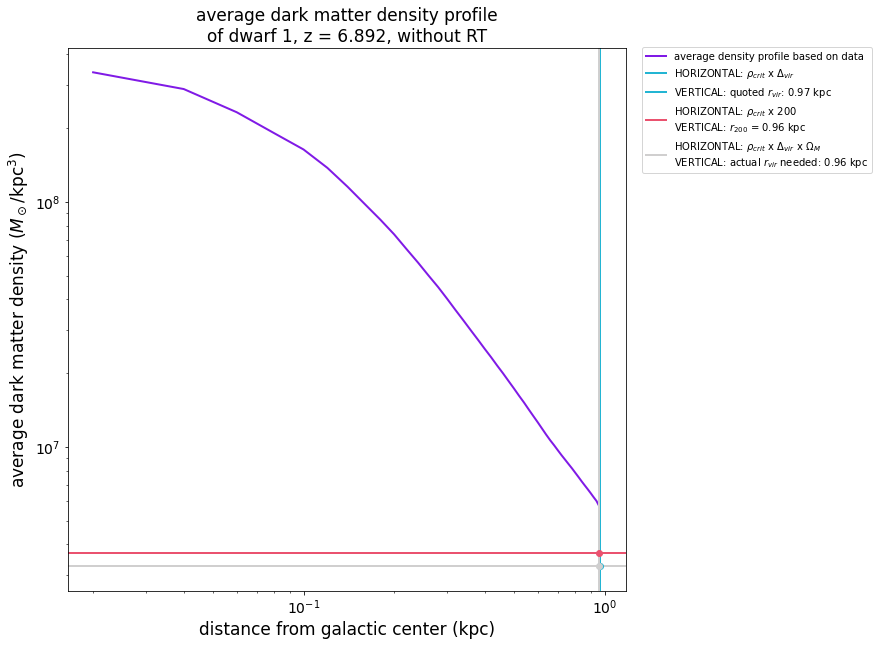

In [40]:
halo6 = NFW_Z(mass_profile091_noRT[np.size(mass_profile091_noRT) - 1])

rho_crit = halo6.rho_crit(6.892)
delta_vir = halo6.delta_vir(6.892)
OmegaM_Z = halo6.OmegaM_Z(6.892)

rho_delta = rho_crit * delta_vir
rho_delta_omega = rho_crit * delta_vir * OmegaM_Z

redshift_7 = AvDensProf(mass_profile091_noRT[np.size(mass_profile091_noRT) - 1])

redshift_7.final_plot(starting_radius, bin_size, r091_noRT, rad_array091_noRT, \
                   9.686753e+02 * 0.001, rho_crit, rho_delta, rho_delta_omega)